## Neural Networks Regressions

In [1]:
import numpy as np

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt

import tensorflow as tf # Para ver la versión
import keras # Para ver la versión

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input

/Users/federicollanes/miniforge3/envs/fede/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"tensorflow=={tf.__version__}")
print(f"keras=={keras.__version__}")

# Unidades de procesamiento
print("\nUnidades de procesamiento:")
for device in tf.config.list_physical_devices():
    print(f"\t- {device.name}")

numpy==1.26.4
matplotlib==3.4.2
tensorflow==2.17.0
keras==3.5.0

Unidades de procesamiento:
	- /physical_device:CPU:0


### Synthetic Data

In [3]:
N = 1000

X = np.random.random((N, 2)) * 6 - 3
y = np.cos(2*X[:, 0]) + np.sin(X[:, 1]**2)

In [6]:
X

array([[-1.6590355 ,  1.61828632],
       [ 2.41402948, -2.66642158],
       [-0.8754351 , -1.62785525],
       ...,
       [ 1.46631525, -1.50596273],
       [ 2.92423574, -0.12361757],
       [ 1.21758601,  0.82386168]])

In [5]:
y

array([-1.16364488e+00,  1.18676427e+00,  1.74554023e+00, -5.18539388e-01,
        1.29525239e+00,  7.92149502e-01,  8.63672805e-01, -7.62743994e-01,
        1.40830416e+00, -1.38174540e-01,  1.67418649e-01,  2.70918783e-01,
        8.18616526e-01, -3.83773424e-01, -2.85370157e-02,  8.70802242e-01,
        1.04430181e+00,  5.67849294e-01,  4.65575292e-02, -7.25349788e-01,
        6.58143981e-02, -1.99895071e-01,  7.19592286e-01, -2.36199673e-02,
       -6.28848872e-01,  9.15510846e-01,  5.49711145e-01, -1.28800383e+00,
        1.62557903e+00, -5.65689888e-01, -4.61750063e-02,  1.66127826e+00,
       -1.54362265e-01,  9.58649275e-02,  1.11022430e-02, -1.43050858e+00,
       -5.97160299e-02,  1.47338667e-01, -9.76529644e-01, -1.79685253e+00,
       -1.51945863e-01, -1.85479289e+00, -8.11302801e-02, -2.25885069e-03,
       -8.87738749e-01, -7.24682032e-01, -7.61968318e-01, -5.42756645e-01,
        1.84325520e+00, -1.65396156e+00, -1.80669669e-01, -3.35944518e-01,
        3.57480589e-01,  

$$
y = cos(2x_{1}) + sin(x_{2}^{2})
$$

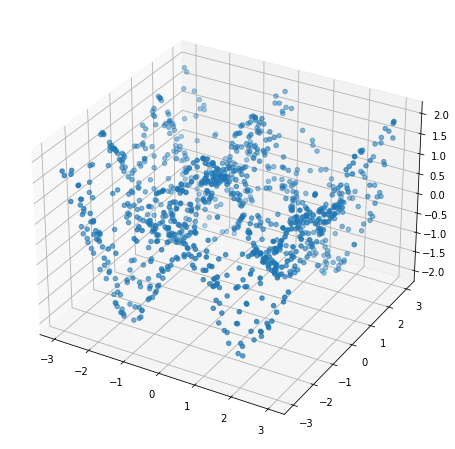

In [7]:
# Plot

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
plt.show()

In [7]:
X.shape

(1000, 2)

In [9]:
(X.shape[1],)

(2,)

### Neural Network

In [10]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Input(shape = (X.shape[1],)))

# Capas Ocultas
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate = 0.2))

# Capa de Salida
model.add(Dense(units = 1))

# Compilamos el modelo
model.compile(optimizer = "adam",
              loss      = "mse")

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(x = X,
                    y = y,
                    epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9196
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8931
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8482
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8459
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7921
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8334
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7745
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7179
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6890 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7285
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6452
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6513
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5720
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5855
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5659
Epo

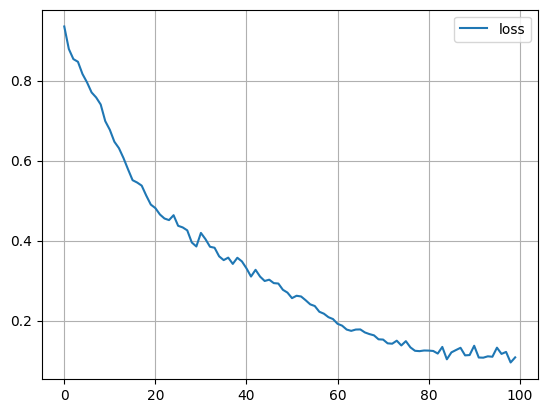

In [11]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.grid()
plt.legend()
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


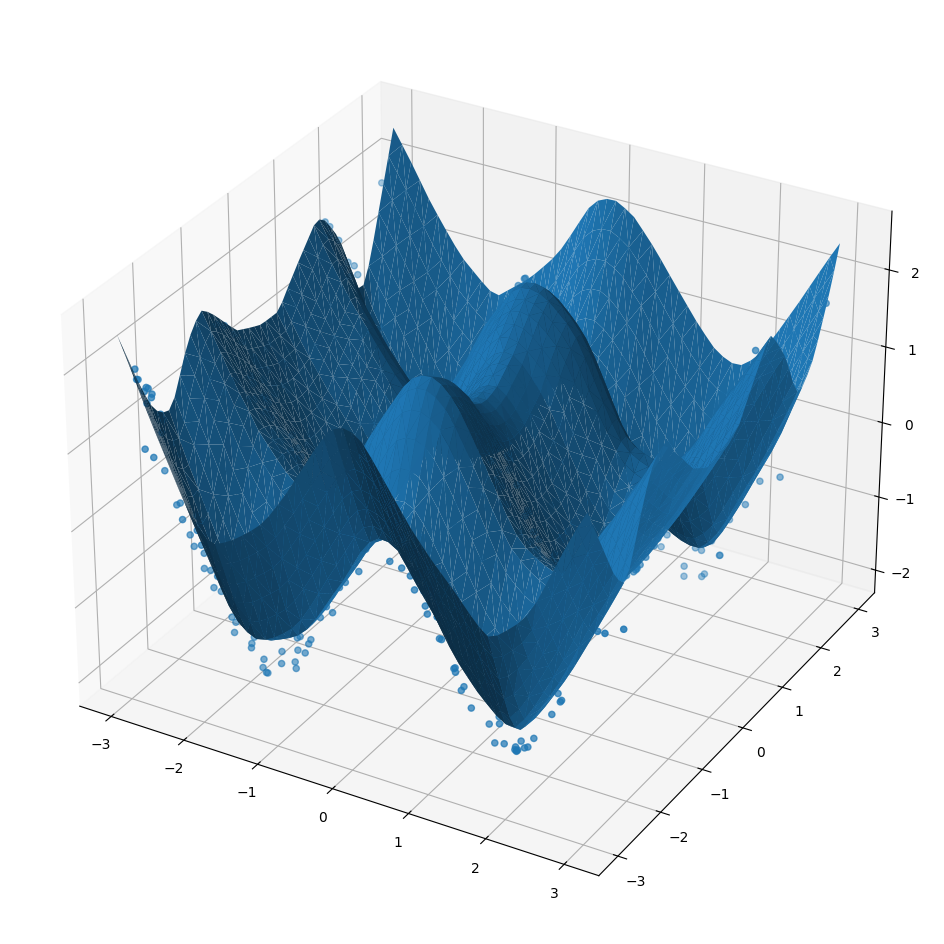

In [12]:
# Plot

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
#plt.show()


# Surface plot

# Mismo rango que los valores iniciales
line = np.linspace(-3, 3, 50) 
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], yhat, linewidth = 0.2, antialiased = True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


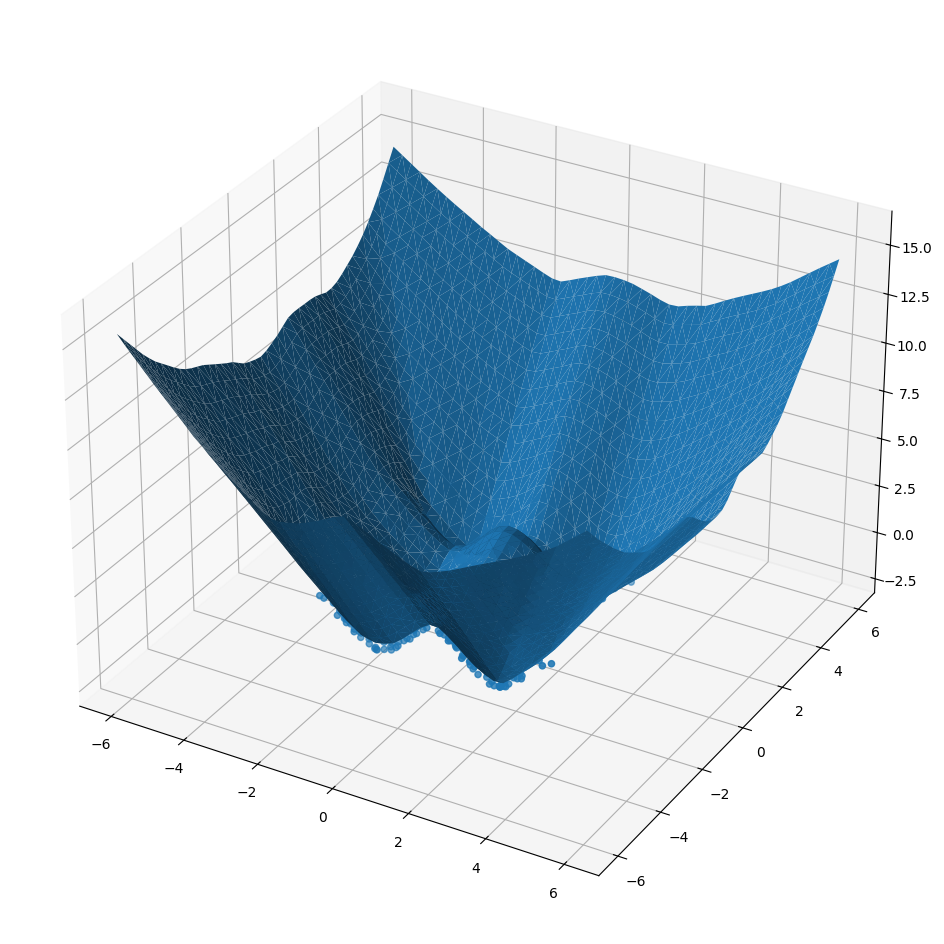

In [13]:
# Plot

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
#plt.show()


# Surface plot
# Rango más amplio que los valores iniciales
line = np.linspace(-6, 6, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], yhat, linewidth = 0.2, antialiased = True)
plt.show()

### Adam - Learning Rate

In [14]:
from keras.optimizers import Adam

# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Dense(units = 128, input_shape = (X.shape[1], ), activation = "relu"))

# Capas Ocultas
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

# Compilamos el modelo
model.compile(optimizer = Adam(learning_rate = 0.00001),
              loss      = "mse")

C:\Users\danie\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x      = X,
                    y      = y,
                    epochs = 10_000)

Epoch 1/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1245
Epoch 2/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0928
Epoch 3/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1055
Epoch 4/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0776
Epoch 5/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9997
Epoch 6/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0344
Epoch 7/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0067
Epoch 8/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9733 
Epoch 9/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9800
Epoch 10/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9560
Epoch 11/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9792
Epoch 12/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0059 
Epoch 13/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9334
Epoch 14/10000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0028 
Epoch 15/10000
32/32 ━━━━━━━━━━━━━━━━━━

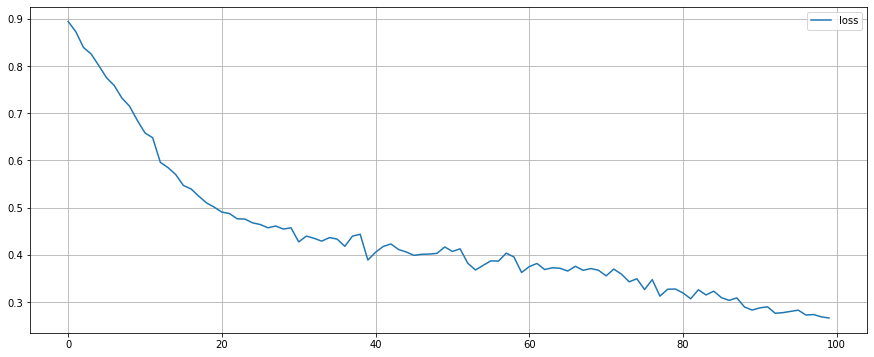

In [13]:
# loss
plt.figure(figsize = (15, 6))
plt.plot(history.history["loss"], label = "loss")
plt.legend()
plt.grid()
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


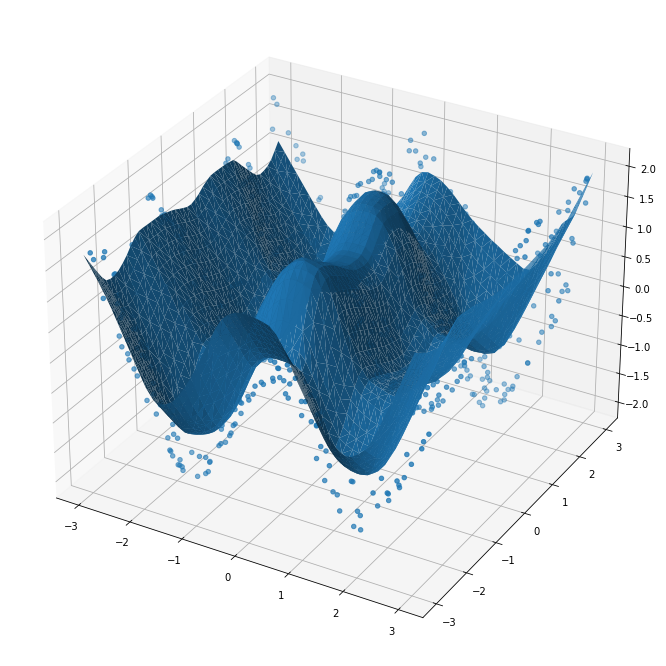

In [14]:
# Plot

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
#plt.show()


# Surface plot

# Mismo rango que los valores iniciales
line = np.linspace(-3, 3, 50) 
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], yhat, linewidth = 0.2, antialiased = True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


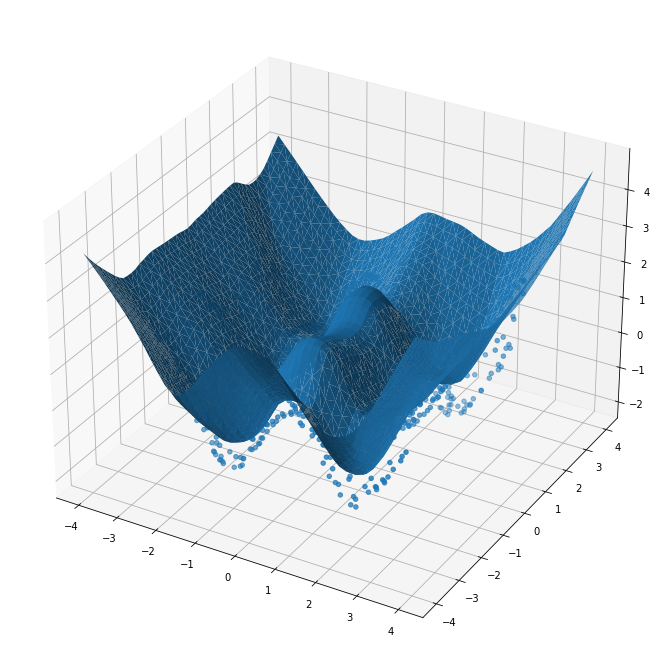

In [15]:
# Plot

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
#plt.show()


# Surface plot
# Rango más amplio que los valores iniciales
line = np.linspace(-4, 4, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], yhat, linewidth = 0.2, antialiased = True)
plt.show()

In [27]:
y_pred = model.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [32]:
#y_pred.flatten()

In [ ]:
# MSE PROMEDIO DE LOS ERROES AL CUADRADO

In [26]:
((y_pred.flatten() - y) ** 2).mean()

0.17041681124835606

In [20]:
y.shape

(1000,)

In [ ]:
################################################################################################################################

### Ejercicios:
- Probar con otra función.
- Crear un conjunto de validación.

In [ ]:
N = 1000

X = np.random.random((N, 2)) * 6 - 3
y = np.sqrt(np.power(X[:, 0], 2) + np.power(X[:, 1], 2))

In [ ]:
X

In [ ]:
y

$$
y = \sqrt{x_{1}^{2} + x_{2}^{2}}
$$

In [ ]:
# Plot

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
plt.show()

In [ ]:
X.shape

### Neural Network

In [ ]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Input(shape = (X.shape[1], )))

# Capas Ocultas
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate = 0.2))

# Capa de Salida
model.add(Dense(units = 1))

# Compilamos el modelo
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "mse")

In [ ]:
model.summary()

In [ ]:
history = model.fit(x = X,
                    y = y,
                    epochs = 1000)

In [ ]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.legend()
plt.show()

In [ ]:
# Plot

fig = plt.figure(figsize = (20, 12))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], y)
#plt.show()


# Surface plot

# Mismo rango que los valores iniciales
line = np.linspace(-3, 3, 50) 
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], yhat, linewidth = 0.2, antialiased = True)
plt.show()